In [36]:
import pandas as pd

In [37]:
data = pd.read_csv('data/examresults.csv', sep=';')

data

,time_invest,passed
0,24,1
1,23,1
2,30,1
3,22,0
4,13,0
5,13,1
6,25,1
7,24,1
8,31,1
9,17,0


In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error as mae

In [39]:
x = 'time_invest'
y = 'passed'

x_train = data[x].to_numpy().reshape((-1, 1))
y_train = data[y].to_numpy().reshape((-1, 1))

In [40]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

pred = lr.predict_proba(x_train)[:, 1]

mae(y_train, pred)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.3039880620016785

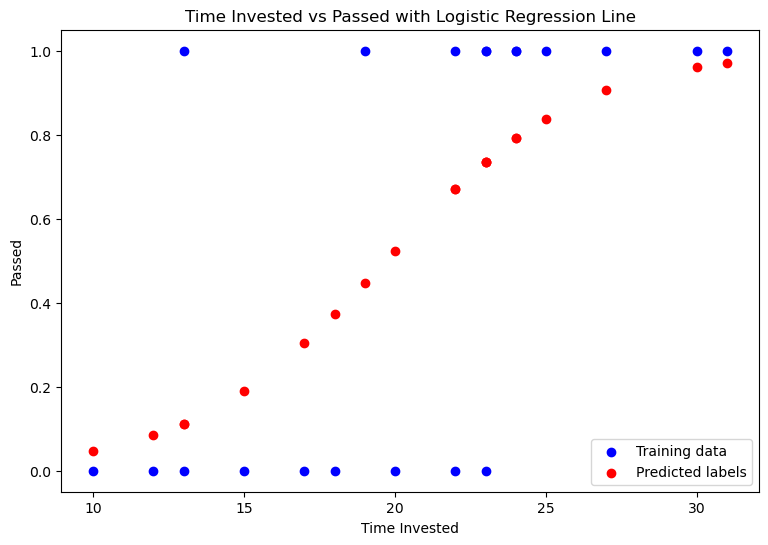

In [41]:
plt.figure(figsize=(9, 6))

plt.title('Time Invested vs Passed with Logistic Regression Line')
plt.xlabel('Time Invested')
plt.ylabel('Passed')

plt.scatter(x_train, y_train, color='blue', label='Training data')
plt.scatter(x_train, pred, color='red', label='Predicted labels')

plt.legend()

plt.show()

In [42]:
lr.predict_proba([[1], [10]])[:, 1]

array([0.00305721, 0.04740231])

In [60]:
b0, b1 = lr.intercept_[0], lr.coef_[0, 0]

def P(n): return 1 / (1 + np.exp(-(b0 + b1 * n)))


P(np.array([1, 10]))

array([0.00305721, 0.04740231])